In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

% matplotlib inline

In [97]:
df = pd.read_csv('clean_titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,NaN


## Dummy Variables
- Sex
- Embarked
- Prefix
- Pclass

## Drop columns
- Cabin
- PassengerID
- Ticket

# Drop Columns

In [98]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [99]:
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


# Dummy variables

In [101]:
pd.get_dummies(df, columns=["Sex"]).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,0,1
1,1,1,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,26.0,0,0,7.9250,S,Miss,1,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,35.0,0,0,8.0500,S,Mr,0,1


In [102]:
df = pd.get_dummies(df, columns=["Sex"])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,0,1
1,1,1,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,26.0,0,0,7.9250,S,Miss,1,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,35.0,0,0,8.0500,S,Mr,0,1


In [103]:
df.drop(['Sex_female'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,1
1,1,1,38.0,1,0,71.2833,C,Mrs,0
2,1,3,26.0,0,0,7.9250,S,Miss,0
3,1,1,35.0,1,0,53.1000,S,Mrs,0
4,0,3,35.0,0,0,8.0500,S,Mr,1


In [104]:
df = pd.get_dummies(df, columns=["Embarked","Pclass","Prefix"])
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Prefix_ Master,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_ the Countess
0,0,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [105]:
df.drop(['Embarked_C','Pclass_2','Prefix_ Master'], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_1,Pclass_3,...,Prefix_ Major,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_ the Countess
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


# Train Test Split

In [106]:
Y = df.loc[:,['Survived']]
X = df.iloc[:,1:]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 39)

# Logistic Regression

In [108]:
logreg = LogisticRegression(solver='lbfgs') #initialize logreg
logreg.fit(x_train,y_train) #fit data into model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
train_acc = logreg.score(x_train,y_train) # Train accuracy
train_acc

0.8105939004815409

In [110]:
test_acc = logreg.score(x_test,y_test) # Test accuracy
test_acc

0.832089552238806

# Confusion matrix

In [111]:
predictions = logreg.predict(x_test)

In [112]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [113]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[158  18]
 [ 27  65]]


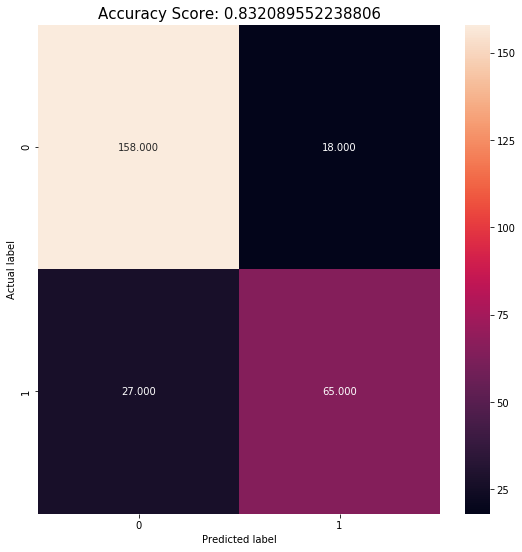

In [114]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_acc)
plt.title(all_sample_title, size = 15);

In [115]:
logreg.coef_

array([[-0.04467462, -0.48786868, -0.18988238,  0.00436899, -0.48390309,
        -0.40553123, -0.30598558,  0.84938958, -1.00015392, -0.16882933,
         0.        , -0.33534156, -0.57297121, -0.32602093,  0.16217744,
        -0.11130823,  0.38563247,  0.11405315,  0.        , -1.68309586,
         1.37782266,  0.16627397, -0.70541293,  0.22329417,  0.        ]])

In [117]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_3', 'Prefix_ Capt', 'Prefix_ Col', 'Prefix_ Don',
       'Prefix_ Dr', 'Prefix_ Jonkheer', 'Prefix_ Lady', 'Prefix_ Major',
       'Prefix_ Miss', 'Prefix_ Mlle', 'Prefix_ Mme', 'Prefix_ Mr',
       'Prefix_ Mrs', 'Prefix_ Ms', 'Prefix_ Rev', 'Prefix_ Sir',
       'Prefix_ the Countess'],
      dtype='object')

# Optional Task: Visualize above weights and talk about them